# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import classification_report
import matplotlib.pyplot as pl

In [3]:
dataframe = pd.read_csv('pollution_dataset.csv')
dataframe.sample(20)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
1158,28.0,45.2,7.3,9.7,24.1,2.2,1.13,12.7,286,Good
1513,23.1,39.7,23.4,27.8,20.4,9.6,1.06,10.5,314,Good
4772,23.7,66.3,11.8,14.4,12.2,1.9,0.79,12.0,248,Good
2430,33.8,72.5,24.5,36.1,26.7,7.3,1.36,7.0,433,Moderate
1169,28.1,64.0,11.7,13.8,15.4,3.4,0.93,11.5,373,Good
2887,36.0,43.9,64.7,76.1,31.1,7.7,1.34,5.1,488,Moderate
3959,24.8,53.7,2.6,8.7,17.6,8.2,1.20,10.9,280,Good
4136,34.5,60.1,18.8,26.3,27.4,15.4,1.65,5.1,616,Moderate
1351,26.3,74.5,12.7,18.3,21.1,1.1,1.01,13.1,365,Good
872,35.7,91.0,49.9,50.3,19.0,15.4,1.94,4.2,539,Poor


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
def label_data(data:pd.DataFrame, columns:list):
  encoder = LabelEncoder()
  data_copy = data.copy()

  for column in columns:
    data_copy[column] = encoder.fit_transform(data_copy[[column]].astype(str).values.ravel())
  return data_copy

In [6]:
dataframe = label_data(dataframe,['Air Quality'])

<Axes: >

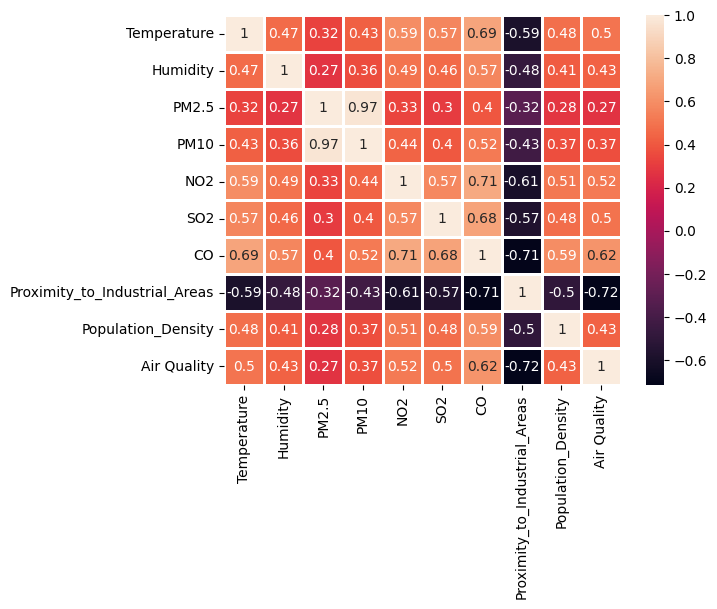

In [7]:
import seaborn as sns
sns.heatmap(dataframe.corr(), annot=True, linewidths=2)

<Axes: xlabel='Air Quality', ylabel='count'>

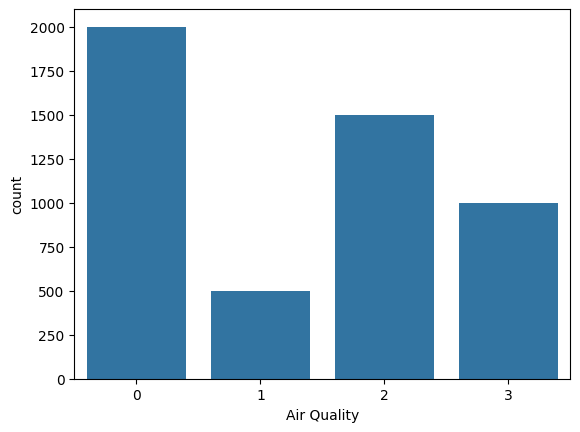

In [8]:
sns.countplot(dataframe, x='Air Quality')

In [9]:
x_data = dataframe.drop(columns=['Air Quality'], axis=1)
y_data = dataframe['Air Quality']

In [10]:
train_X, test_X, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [11]:

scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [12]:
model1 = Sequential([
    Input(shape=(x_data.shape[1],)),
    Dense(32, activation='relu', input_shape=(x_data.shape[1],)),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

model2 = Sequential([
    Input(shape=(x_data.shape[1],)),
    Dense(64, activation='tanh', input_shape=(x_data.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

model3 = Sequential([
    Input(shape=(x_data.shape[1],)),
    Dense(128, activation='relu', input_shape=(x_data.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

C:\Users\kosto\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
from tensorflow.keras.optimizers import Adam
models = [model1, model2, model3]
for i, model in enumerate(models, 1):
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
x_data = scaler.fit_transform(x_data)
x_data

array([[0.36283186, 0.25081433, 0.01762712, ..., 0.3485342 , 0.16309013,
        0.17035111],
       [0.32964602, 0.42996743, 0.00779661, ..., 0.32247557, 0.15021459,
        0.55006502],
       [0.21460177, 0.42019544, 0.09050847, ..., 0.31921824, 0.11587983,
        0.56046814],
       ...,
       [0.27654867, 0.45819761, 0.04813559, ..., 0.31921824, 0.30472103,
        0.24837451],
       [0.26327434, 0.09120521, 0.07254237, ..., 0.0781759 , 0.39055794,
        0.06892068],
       [0.23672566, 0.45494028, 0.27694915, ..., 0.23778502, 0.24892704,
        0.3550065 ]])

In [16]:
print("x_data shape:", x_data.shape)
from tensorflow.keras.utils import to_categorical
y_data = to_categorical(y_data)
print("y_data shape:", y_data.shape)

x_data shape: (5000, 9)
y_data shape: (5000, 4)


In [17]:
from tensorflow.keras.utils import to_categorical
history_list = []
for i, model in enumerate(models, 1):
    print(f"Training Model {i}...")
    history = model.fit(
    x_data,  # Input features
    y_data,  # One-hot encoded labels
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)
    history_list.append(history)

Training Model 1...
Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4402 - loss: 1.3249 - val_accuracy: 0.7180 - val_loss: 0.9571
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7803 - loss: 0.8089 - val_accuracy: 0.8540 - val_loss: 0.5062
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8742 - loss: 0.4604 - val_accuracy: 0.9130 - val_loss: 0.3497
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9090 - loss: 0.3410 - val_accuracy: 0.9190 - val_loss: 0.2843
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9198 - loss: 0.2821 - val_accuracy: 0.9180 - val_loss: 0.2546
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9247 - loss: 0.2403 - val_accuracy: 0.9280 - val_loss: 0.2250
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9227 - loss: 0.2299 - val_accuracy: 0.9260 - val_loss: 0.2150
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9217 - loss: 0.222

In [18]:
from sklearn.metrics import f1_score
pred_y = [probs.tolist().index(max(probs)) for probs in model1.predict(test_X)]
print(classification_report(test_y, pred_y))
print(f1_score(test_y, pred_y, average='micro'))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.87      0.85      0.86       111
           2       0.96      0.94      0.95       294
           3       0.83      0.86      0.84       186

    accuracy                           0.94      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000

0.939


In [19]:
pred_y = [probs.tolist().index(max(probs)) for probs in model2.predict(test_X)]
print(classification_report(test_y, pred_y))
print(f1_score(test_y, pred_y, average='micro'))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.86      0.85      0.85       111
           2       0.96      0.95      0.96       294
           3       0.84      0.85      0.85       186

    accuracy                           0.94      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000

0.942


In [20]:
pred_y = [probs.tolist().index(max(probs)) for probs in model3.predict(test_X)]
print(classification_report(test_y, pred_y))
print(f1_score(test_y, pred_y, average='micro'))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.91      0.86      0.88       111
           2       0.97      0.94      0.95       294
           3       0.83      0.90      0.86       186

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000

0.947
